In [20]:
#Importing Necessary library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error 

In [21]:
#Importing data
data = pd.read_excel('data2.xlsx') 

In [22]:
#The discription of data 
data

,Samplename,Long,Lat,Elevation,Waterlevel,Arsen,Contamination
0,1,108,-7,690,2.9,1.000,Contaminated
1,2,108,-7,676,2.0,0.515,Contaminated
2,3,108,-7,722,5.5,0.864,Contaminated
3,4,108,-7,642,0.6,1.140,Contaminated
4,5,108,-7,669,1.1,0.852,Contaminated
5,6,108,-7,746,1.3,0.934,Contaminated
6,7,108,-7,683,1.4,1.040,Contaminated
7,8,108,-7,640,0.4,0.378,Contaminated
8,9,107,-7,652,0.8,1.090,Contaminated
9,10,108,-7,743,0.5,0.740,Contaminated


In [23]:
#Target column name is "Contamination"
target_df = pd.DataFrame(data=data, columns = ['Contamination'])

In [24]:
#Target data
target_df

,Contamination
0,Contaminated
1,Contaminated
2,Contaminated
3,Contaminated
4,Contaminated
5,Contaminated
6,Contaminated
7,Contaminated
8,Contaminated
9,Contaminated


In [25]:
#Converting data to "0" and "1"
def converter(contamination):
    if contamination == "Contaminated":
        return 0
    else:
        return 1

In [26]:
#Apply converter function now 
target_df['Contamination'] = target_df['Contamination'].apply(converter)

In [27]:
target_df

,Contamination
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [28]:
data.describe()

,Samplename,Long,Lat,Elevation,Waterlevel,Arsen
count,41.000000,41.000000,41.0,41.000000,41.000000,41.000000
mean,26.731707,107.439024,-7.0,995.682927,1.351220,0.768000
std,32.506172,0.502433,0.0,338.010165,1.201899,0.547475
min,1.000000,107.000000,-7.0,382.000000,0.000000,0.001000
25%,11.000000,107.000000,-7.0,693.000000,0.500000,0.399000
50%,21.000000,107.000000,-7.0,1063.000000,1.100000,0.742000
75%,32.000000,108.000000,-7.0,1194.000000,2.000000,1.000000
max,200.000000,108.000000,-7.0,2187.000000,5.500000,3.250000


In [29]:
#Changing contamination to '0' and allowed to '1' 
data.drop('Contamination', axis = 1, inplace = True)

In [30]:
data

,Samplename,Long,Lat,Elevation,Waterlevel,Arsen
0,1,108,-7,690,2.9,1.000
1,2,108,-7,676,2.0,0.515
2,3,108,-7,722,5.5,0.864
3,4,108,-7,642,0.6,1.140
4,5,108,-7,669,1.1,0.852
5,6,108,-7,746,1.3,0.934
6,7,108,-7,683,1.4,1.040
7,8,108,-7,640,0.4,0.378
8,9,107,-7,652,0.8,1.090
9,10,108,-7,743,0.5,0.740


In [31]:
target_df

,Contamination
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [32]:
#The changed data 
data_df = pd.concat([data,target_df],axis=1)

In [33]:
data_df 

,Samplename,Long,Lat,Elevation,Waterlevel,Arsen,Contamination
0,1,108,-7,690,2.9,1.000,0
1,2,108,-7,676,2.0,0.515,0
2,3,108,-7,722,5.5,0.864,0
3,4,108,-7,642,0.6,1.140,0
4,5,108,-7,669,1.1,0.852,0
5,6,108,-7,746,1.3,0.934,0
6,7,108,-7,683,1.4,1.040,0
7,8,108,-7,640,0.4,0.378,0
8,9,107,-7,652,0.8,1.090,0
9,10,108,-7,743,0.5,0.740,0


In [34]:
#Drop the Arsen column to make prediction on arsen 
X = data_df.drop(labels='Arsen',axis=1)
y = data_df['Arsen']

In [35]:
#data without arsen
X

,Samplename,Long,Lat,Elevation,Waterlevel,Contamination
0,1,108,-7,690,2.9,0
1,2,108,-7,676,2.0,0
2,3,108,-7,722,5.5,0
3,4,108,-7,642,0.6,0
4,5,108,-7,669,1.1,0
5,6,108,-7,746,1.3,0
6,7,108,-7,683,1.4,0
7,8,108,-7,640,0.4,0
8,9,107,-7,652,0.8,0
9,10,108,-7,743,0.5,0


In [53]:
#The size of data from here
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 10)
print("Train Shape:", X_train.shape)
print("Test Shape:", X_test.shape)
print("Train Label:", y_train.shape)
print("Test Label:", y_test.shape)

Train Shape: (32, 6)
Test Shape: (9, 6)
Train Label: (32,)
Test Label: (9,)


In [37]:
lr = LinearRegression()
history = lr.fit(X_train,y_train)

In [38]:
#compiles the model
history 

LinearRegression()

In [39]:
#the prediction
pred = history.predict(X_test) 

In [40]:
pred

array([ 0.70176584,  0.93388251, -0.52070251,  0.79830151,  0.72740024,
        0.87712357,  1.35294407,  0.82011124,  0.83794652])

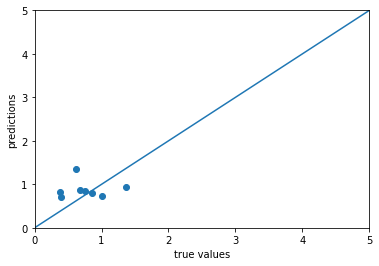

In [41]:
# garph, because lack of data :( 
plt.scatter(y_test,pred)
plt.xlabel('true values')
plt.ylabel('predictions')
lims = [0,5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)

In [42]:
# Evaluating Model's Performance
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))


Mean Absolute Error: 0.3421121652303591
Mean Squared Error: 0.15834355330832553


In [43]:
#this is the prediction model 
data_df.loc[2]

Samplename         3.000
Long             108.000
Lat               -7.000
Elevation        722.000
Waterlevel         5.500
Arsen              0.864
Contamination      0.000
Name: 2, dtype: float64

In [44]:
dictionary = {'Samplename': [3.000],
             'Long': [108.000],
              'Lat': [-7.000],
             'Elevation': [722.000],
             'Waterlevel': [5.500],
             'Arsen':[0.864],
             'Contamination':[0.000]}

In [45]:
test_df = pd.DataFrame(data=dictionary)

In [46]:
test_df

,Samplename,Long,Lat,Elevation,Waterlevel,Arsen,Contamination
0,3.0,108.0,-7.0,722.0,5.5,0.864,0.0


In [47]:
X_test = test_df.drop('Arsen', axis = 1)
y_test = test_df['Arsen']

In [48]:
lr.predict(X_test)

array([0.79830151])

In [49]:
print('predicted arsen:', pred[0])
print('actual arsen:', 0.864)

predicted arsen: 0.7017658373346904
actual arsen: 0.864
